# Functions for Processing
----

#### Note


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json as js
from scipy.stats import linregress
from collections import Counter 

# Import API key - usng CBS keys - not used yet
#from api_keys import sport_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Input test file (JSON)
input_data_file='events.json'
# Output File (CSV)
output_data_file = "../output_data/eventsMaster.csv"


## Generate Events listing

In [14]:
with open(input_data_file) as f:
  data = js.load(f)
#gives a dictionary
#data.values()


In [3]:
import pprint
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(data)


{'count': 706,
 'events': [{'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617640343,
             'datetimeupdated': 1617640381,
             'endtime': 1618181100,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Demon Baseball vs Lamar',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '27a62c10-4a15-42ae-a81b-9b31c346ffb9/master/27a62c10-4a15-42ae-a81b-9b31c346ffb9',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/27a62c10-4a15-42ae-a81b-9b31c346ffb9/master/27a62c10-4a15-42ae-a81b-9b31c346ffb9.m3u8',
             'prismid': '27a62c10-4a15-42ae-a81b-9b31c346ffb9',
             'region': 'live-e',
             'retry': 0,
        

             'prismid': 'a46dc5b4-45ee-4f3b-b5f3-999b766f7722',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                                         'Live'},
             'retry': 0,
             'schedule': {'endtimestamp': 1617406504,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618026600},
             'school': 'dave',
             'school_name': 'Davenport University',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-lacros',
             'sport_name': 

             'eventstatus': 'live',
             'eventtitle': 'vs. Missouri',
             'eventtype': 'game',
             'is_passthrough': True,
             'istest': False,
             'playbackUrl': 'https://learfield-ccbd.sidearmsports.com/130/smil:SC1_adapt.smil/playlist.m3u8',
             'prismid': '2aa2046c-3c0e-4890-aa92-2f7f910ea7f6',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                                         'Live'},
             'retry': 0,
             'schedule': {'endtimestamp': 1618106400,
                          'starttimebuffer': 0,
                

             'schedule': {'endtimestamp': 1617843600,
                          'starttimebuffer': 0,
                          'starttimestamp': 1617831900},
             'school': 'illw',
             'school_name': 'Illinois Wesleyan University',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'w-volley',
             'sport_name': "Women's Volleyball",
             'starttime': 1617831900,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'LIVE'},
            {'contenttype': 'audio',
             'continuousevent': False,
             'datetimecreated': 1614281994,
             'datetimeupdated': 1617221237,
             'endtime': 1618020000,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
         

             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. Washington University in St. Louis',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '70a1f144-fd06-4007-8329-414332ba2961/master/70a1f144-fd06-4007-8329-414332ba2961',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/70a1f144-fd06-4007-8329-414332ba2961/master/70a1f144-fd06-4007-8329-414332ba2961.m3u8',
             'prismid': '70a1f144-fd06-4007-8329-414332ba2961',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                 

             'starttime': 1617822600,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617642953,
             'datetimeupdated': 1617643093,
             'endtime': 1617836400,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Softball vs. Northern Illinois ',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '319a581d-1c0a-4e2e-973f-32ca653136e4/master/319a581d-1c0a-4e2e-973f-32ca653136e4',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/319a581d-1c0a-4e2e-973f-32ca653136e4/master/319a581d-1

             'schedule': {'endtimestamp': 1618098600,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618069800},
             'school': 'aeast',
             'school_name': 'America East Conference',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-basebl',
             'sport_name': 'Baseball',
             'starttime': 1618069800,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'audio',
             'continuousevent': False,
             'datetimecreated': 1617642740,
             'datetimeupdated': 1617642740,
             'endtime': 1618095600,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtit

             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1612110658,
             'datetimeupdated': 1612110658,
             'endtime': 1617921000,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': "Women's Soccer vs. St. John's",
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'e093c2e4-6275-488e-a3d6-5da95e364294/master/e093c2e4-6275-488e-a3d6-5da95e364294',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/e093c2e4-6275-488e-a3d6-5da95e364294/master/e093c2e4-6275-488e-a3d6-5da95e364294.m3u8',
      

            {'contenttype': 'audio',
             'continuousevent': False,
             'datetimecreated': 1614016460,
             'datetimeupdated': 1614016460,
             'endtime': 1618102800,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. Sam Houston (Doubleheader)',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '65d457e5-4c16-4463-a1ca-4f622d8e4b15/master/65d457e5-4c16-4463-a1ca-4f622d8e4b15',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/65d457e5-4c16-4463-a1ca-4f622d8e4b15/master/65d457e5-4c16-4463-a1ca-4f622d8e4b15.m3u8',
             'prismid': '65d457e5-4c16-4463-a1ca-4f622d8e4b15',
             'region': 'live-e',
             'related_tags': {'25802-1507

             'datetimeupdated': 1617639819,
             'endtime': 1618028100,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Baseball vs. Lamar',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '74e97bbb-da55-42ab-b4c4-48e49d7b32f4/master/74e97bbb-da55-42ab-b4c4-48e49d7b32f4',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/74e97bbb-da55-42ab-b4c4-48e49d7b32f4/master/74e97bbb-da55-42ab-b4c4-48e49d7b32f4.m3u8',
             'prismid': '74e97bbb-da55-42ab-b4c4-48e49d7b32f4',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1618028100,
                          'starttimebuffer': 0,
                          'starttimestamp': 16

             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617290107,
             'datetimeupdated': 1617290107,
             'endtime': 1618023600,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. Lamar',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '0c7b8a6e-5247-4c62-a5aa-f6217b55f0e6/master/0c7b8a6e-5247-4c62-a5aa-f6217b55f0e6',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/0c7b8a6e-5247-4c62-a5aa-f6217b55f0e6/master/0c7b8a6e-5247-4c62-a5aa-f6217b55f0e6.m3u8',
             'prismid': '0c7b8a6e-5247-4c62-a5aa-f6217b55f0e6',
             'region': 'live-e',
             'retry': 0

             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Field Hockey vs. Temple',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '621106e7-9c6c-4187-96cd-cdfc9d3c5aa6/master/621106e7-9c6c-4187-96cd-cdfc9d3c5aa6',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/621106e7-9c6c-4187-96cd-cdfc9d3c5aa6/master/621106e7-9c6c-4187-96cd-cdfc9d3c5aa6.m3u8',
             'prismid': '621106e7-9c6c-4187-96cd-cdfc9d3c5aa6',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
     

             'video_status': 'LIVE'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617130242,
             'datetimeupdated': 1617130242,
             'endtime': 1618171200,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Softball vs. DePaul',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'edbcb4a4-db0e-41cc-a034-f8bf02b8e28b/master/edbcb4a4-db0e-41cc-a034-f8bf02b8e28b',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/edbcb4a4-db0e-41cc-a034-f8bf02b8e28b/master/edbcb4a4-db0e-41cc-a034-f8bf02b8e28b.m3u8',
             'prismid': 'edbcb4a4-db0e-41cc-a034-f8bf02b8e28b',
             'region': 'live-e',
             '

                          'starttimestamp': 1618155900},
             'school': 'duke',
             'school_name': 'Duke University',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-basebl',
             'sport_name': 'Baseball',
             'starttime': 1618155900,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617483606,
             'datetimeupdated': 1617483606,
             'endtime': 1618088400,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. Montevallo',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
           

            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1616101234,
             'datetimeupdated': 1616101234,
             'endtime': 1617840000,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Saint Vincent at Franciscan',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '3be0856e-0215-4b9a-9585-f0adc63da458/master/3be0856e-0215-4b9a-9585-f0adc63da458',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/3be0856e-0215-4b9a-9585-f0adc63da458/master/3be0856e-0215-4b9a-9585-f0adc63da458.m3u8',
             'prismid': '3be0856e-0215-4b9a-9585-f0adc63da458',
             'region': 'live-e',
             'related_tags': {'25802-1507041

             'datetimecreated': 1613064222,
             'datetimeupdated': 1613064222,
             'endtime': 1618084800,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'BSB AUDIO: Charlotte at FIU (Game 1)',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'a82acec5-1c2c-4767-86cc-0bb5282cf9b8/master/a82acec5-1c2c-4767-86cc-0bb5282cf9b8',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/a82acec5-1c2c-4767-86cc-0bb5282cf9b8/master/a82acec5-1c2c-4767-86cc-0bb5282cf9b8.m3u8',
             'prismid': 'a82acec5-1c2c-4767-86cc-0bb5282cf9b8',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1618084800,
                          'start

             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'd0b138f1-ace0-41bd-af60-668a967fc221/master/d0b138f1-ace0-41bd-af60-668a967fc221',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/d0b138f1-ace0-41bd-af60-668a967fc221/master/d0b138f1-ace0-41bd-af60-668a967fc221.m3u8',
             'prismid': 'd0b138f1-ace0-41bd-af60-668a967fc221',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                                         'Live'},
             'r

             'datetimeupdated': 1616687440,
             'endtime': 1617843600,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'MSoccer vs Suffolk CC',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '86d89eaa-1503-4eff-8eb2-885fe04cd1c9/master/86d89eaa-1503-4eff-8eb2-885fe04cd1c9',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/86d89eaa-1503-4eff-8eb2-885fe04cd1c9/master/86d89eaa-1503-4eff-8eb2-885fe04cd1c9.m3u8',
             'prismid': '86d89eaa-1503-4eff-8eb2-885fe04cd1c9',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
        

             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'LIVE'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1617651121,
             'datetimeupdated': 1617651121,
             'endtime': 1618167660,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': "Women's Lacrosse vs. Marquette",
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '89051679-f727-4c16-b6aa-ee43c1838467/master/89051679-f727-4c16-b6aa-ee43c1838467',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/89051679-f727-4c16-b6aa-ee43c1838467/master/89051679-f727-4c16-b6aa-ee43c1838467.m3u8',
      

             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'cc077e12-3bd5-4b54-a28d-2e5a611af45d/master/cc077e12-3bd5-4b54-a28d-2e5a611af45d',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/cc077e12-3bd5-4b54-a28d-2e5a611af45d/master/cc077e12-3bd5-4b54-a28d-2e5a611af45d.m3u8',
             'prismid': 'cc077e12-3bd5-4b54-a28d-2e5a611af45d',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'Target Site : Sports '
                                                         'Live'},
             'retry': 0,
             'schedule':

                                                         'Live'},
             'retry': 0,
             'schedule': {'endtimestamp': 1618182000,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618166700},
             'school': 'cumberlands',
             'school_name': 'University of the Cumberlands',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'm-basebl',
             'sport_name': 'Baseball',
             'starttime': 1618166700,
             'transcodeprofile': {'id': None, 'name': 'name'},
             'venue': 'venue',
             'video_status': 'LIVE'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1616522529,
             'datetimeupdated': 1616522529,
             'endtime': 1618081200,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instruction

             'datetimeupdated': 1617204035,
             'endtime': 1617930000,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'vs. Albany',
             'eventtype': 'game',
             'is_passthrough': True,
             'istest': False,
             'playbackUrl': 'https://learfield-ccbd.sidearmsports.com/133/smil:Syracuse1_adapt.smil/playlist.m3u8',
             'prismid': 'df4a51a6-32c9-4baf-ac2c-b4c2662ac489',
             'region': 'live-e',
             'related_tags': {'25802-1507041902': 'Entitlement : Sports Live : '
                                                  'College Sports Live Monthly',
                              '25802-1507041903': 'Entitlement : Sports Live : '
                                                  'College Sports Live Annual',
                              'target-site-sports-live': 'T

             'venue': 'venue',
             'video_status': 'DRAFT'},
            {'contenttype': 'video',
             'continuousevent': False,
             'datetimecreated': 1611173732,
             'datetimeupdated': 1616426678,
             'endtime': 1618095600,
             'environment': 'cms.cbsiadvancedmedia.com',
             'eventinstructions': 'instructions',
             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'SB: UTEP vs UAB DH',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '6445366d-f7d6-4879-aa54-ba557bec1c66/master/6445366d-f7d6-4879-aa54-ba557bec1c66',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/6445366d-f7d6-4879-aa54-ba557bec1c66/master/6445366d-f7d6-4879-aa54-ba557bec1c66.m3u8',
             'prismid': '6445366d-f7d6-4879-aa54-ba557bec1c66',
             're

             'eventstate': 'scheduled',
             'eventstatus': 'live',
             'eventtitle': 'Colgate at Holy Cross',
             'eventtype': 'game',
             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': '0734c16d-2b88-48ef-8167-5aa53bcbb526/master/0734c16d-2b88-48ef-8167-5aa53bcbb526',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/0734c16d-2b88-48ef-8167-5aa53bcbb526/master/0734c16d-2b88-48ef-8167-5aa53bcbb526.m3u8',
             'prismid': '0734c16d-2b88-48ef-8167-5aa53bcbb526',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1618092000,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618079400},
             'school': 'patr',
             'school_name': 'Patriot League',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'S

             'ingest': {'primary': {...}},
             'is_passthrough': False,
             'istest': False,
             'path': 'eb4a6b6d-65c2-458a-af11-800dfec0e357/master/eb4a6b6d-65c2-458a-af11-800dfec0e357',
             'playbackUrl': 'https://cbsshef7-cbsshef7-ms.global.ssl.fastly.net/eb4a6b6d-65c2-458a-af11-800dfec0e357/master/eb4a6b6d-65c2-458a-af11-800dfec0e357.m3u8',
             'prismid': 'eb4a6b6d-65c2-458a-af11-800dfec0e357',
             'region': 'live-e',
             'retry': 0,
             'schedule': {'endtimestamp': 1617915600,
                          'starttimebuffer': 0,
                          'starttimestamp': 1617907800},
             'school': 'aeast',
             'school_name': 'America East Conference',
             'source_id': '1dab7797-1970-43f9-bbeb-9bd9bb8a36fd',
             'source_name': 'SideArm',
             'sport': 'w-softbl',
             'sport_name': 'Softball',
             'starttime': 1617907800,
             'transcodeprofile':

Need: 
'count'  - gives the number of events in the list
nested in 'count'
'events' - nested
 by 'contenttype'
     'eventstate' 'scheduled'
     'eventstatus' 'live'
     'eventtype' 'game'
     'is_passthrough' 'False'
     'prismid': '27a62c10-4a15-42ae-a81b-9b31c346ffb9',  [unique id]
     'schedule': {'endtimestamp': 1618181100,
                          'starttimebuffer': 0,
                          'starttimestamp': 1618163100},
     'school': 'nwst',
     'school_name': 'Northwestern State University',
     'sport': 'm-basebl',
     'sport_name': 'Baseball',



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#another way to print

#pp.pprint(f'Dictionary comprehension: {data}')

In [5]:
data.keys()

dict_keys(['events', 'count'])

In [6]:
newDict={}
print(data['count'])
newCount=0
#filter out the passthrough records
Counts=data['count']
#first look for passthrough = True
for index in range(1,Counts):
    if data['events'][index]['is_passthrough']==False:
        newDict=data
        newCount= newCount+1
    
#print(newDict)    
print(f'filtered data counts {newCount}')

706
filtered data counts 558


In [7]:
ID=[]
Type=[]
Scheduled=[]
Status=[]
CType=[]
Pass=[]
Start=[]
End=[]
Event_Title=[]
School_Name=[]
School_Code=[]
Game=[]
PubPoint=[]


for index in range(1,newCount):
    try:
        ID.append(newDict['events'][index]['prismid'])
        Type.append(newDict['events'][index]['eventtype'])
        Scheduled.append(newDict['events'][index]['eventstate'])
        Status.append(newDict['events'][index]['eventstatus'])
        #CType.append(newDict['events'][index]['contenttype'])
        Pass.append(newDict['events'][index]['is_passthrough'])
        Start.append(newDict['events'][index]['starttime'])
        End.append(newDict['events'][index]['endtime'])
        Event_Title.append(newDict['events'][index]['eventtitle'])
        School_Name.append(newDict['events'][index]['school_name'])
        School_Code.append(newDict['events'][index]['school'])
        Game.append(newDict['events'][index]['sport_name'])
        #PubPoint.append(newDict['events'][index]['ingest']['primary']['pub_point'])
    except ValueError:
        continue
    except KeyError:
        print(index)
        continue
             
        
  
    
event_df=pd.DataFrame(ID)
event_df['Event type']=Type
event_df['Scheduled']=Scheduled
event_df['Is Live']=Status
#event_df['Content Type']=CType
event_df['PassThru']=Pass
event_df['Start Time']=Start
event_df['End Time']=End
event_df['Event']=Event_Title
event_df['School Name']=School_Name
event_df['School Code']=School_Code
event_df['Sport']=Game
#event_df['Access Point']=PubPoint
event_df.rename(columns={0:'ID'},inplace=True)
event_df.set_index('ID',inplace=True)



In [8]:
event_df

,Event type,Scheduled,Is Live,PassThru,Start Time,End Time,Event,School Name,School Code,Sport
ID,,,,,,,,,,
80454be6-1828-499d-b398-6c3b38f30a28,game,scheduled,live,False,1618008600,1618020000,SB: Middle Tennessee vs Marshall,Conference USA,c-usa,Softball
f9547332-f5d5-49e0-bc8f-63ec97466837,game,scheduled,live,False,1618073400,1618084800,vs. Ashland,Davenport University,dave,Baseball
cc6a38ff-0b50-4d79-b47f-320b77188954,game,scheduled,live,False,1618076700,1618110000,UWG Baseball vs. Union,University of West Georgia,wega,Baseball
bc057b3e-4358-4089-aea2-05ac0004396c,game,scheduled,live,False,1617822000,1617840000,Bethany at W&J,Presidents Athletic Conference,pac,Softball
1281a5f2-414e-4349-ab70-63900958ec47,game,scheduled,live,False,1618008600,1618020000,BSB AUDIO: Charlotte at FIU,Conference USA,c-usa,Baseball
...,...,...,...,...,...,...,...,...,...,...
a65b3462-a775-445e-b7d2-c330c4476fbe,game,scheduled,live,False,1617820200,1617836400,Men's Soccer vs. UConn,Providence College,prov,Men's Soccer
7ae76f4d-602a-42c9-b0cd-52915f71dcc2,game,scheduled,live,True,1618165800,1618185600,Baseball at Auburn,Mississippi State University,msst,Baseball
d986f7b6-fea3-4a03-ac1e-8dbfaef364af,game,scheduled,live,False,1617986700,1618002000,vs. Memphis,East Carolina University,ecu,Baseball


In [9]:
event_df.columns

Index(['Event type', 'Scheduled', 'Is Live', 'PassThru', 'Start Time',
       'End Time', 'Event', 'School Name', 'School Code', 'Sport'],
      dtype='object')

In [10]:
#output dataframe to CSV file
event_df.to_csv('events.csv')

In [11]:
#process for location lat/lng by School Name
#from api_keys import g_key

#school locations to come later this week

In [12]:
import datetime

count=[]
x=0

Start=list(map(int, Start))   
End=list(map(int, End))
y=len(Start)
for x in range(len(Start)):
    Start[x]=datetime.datetime.fromtimestamp(Start[x])
    End[x]=datetime.datetime.fromtimestamp(End[x])
    count.append(x)

active_runtime_df= pd.DataFrame(count)   
    #active_runtime_df['Start']= datetime.datetime.fromtimestamp(Start)  
active_runtime_df['Start']= pd.DataFrame(Start)
    #active_runtime_df['End']= datetime.datetime.fromtimestamp(End)   
active_runtime_df['End']= pd.DataFrame(End)

In [16]:
active_runtime_df = active_runtime_df.sort_values(by="Start")
active_runtime_df

,0,Start,End
332,332,2021-04-06 17:45:00,2021-04-07 00:00:00
65,65,2021-04-06 17:45:00,2021-04-07 00:30:00
439,439,2021-04-06 17:55:00,2021-04-07 00:00:00
505,505,2021-04-06 18:30:00,2021-04-07 00:00:00
151,151,2021-04-06 18:30:00,2021-04-07 00:00:00
...,...,...,...
354,354,2021-04-11 16:00:00,2021-04-11 21:05:00
11,11,2021-04-11 16:00:00,2021-04-11 19:00:00
158,158,2021-04-11 16:30:00,2021-04-11 21:45:00
438,438,2021-04-11 18:20:00,2021-04-11 19:45:00


In [31]:
import pandas as pd
from io import StringIO

active_runtime_df['Start Date'], active_runtime_df['Start Time'] = active_runtime_df['Start'].dt.date, active_runtime_df['Start'].dt.time
active_runtime_df['End Date'], active_runtime_df['End Time'] = active_runtime_df['End'].dt.date, active_runtime_df['End'].dt.time

print(active_runtime_df)

       0               Start                 End  Start Date Start Time  \
332  332 2021-04-06 17:45:00 2021-04-07 00:00:00  2021-04-06   17:45:00   
65    65 2021-04-06 17:45:00 2021-04-07 00:30:00  2021-04-06   17:45:00   
439  439 2021-04-06 17:55:00 2021-04-07 00:00:00  2021-04-06   17:55:00   
505  505 2021-04-06 18:30:00 2021-04-07 00:00:00  2021-04-06   18:30:00   
151  151 2021-04-06 18:30:00 2021-04-07 00:00:00  2021-04-06   18:30:00   
..   ...                 ...                 ...         ...        ...   
354  354 2021-04-11 16:00:00 2021-04-11 21:05:00  2021-04-11   16:00:00   
11    11 2021-04-11 16:00:00 2021-04-11 19:00:00  2021-04-11   16:00:00   
158  158 2021-04-11 16:30:00 2021-04-11 21:45:00  2021-04-11   16:30:00   
438  438 2021-04-11 18:20:00 2021-04-11 19:45:00  2021-04-11   18:20:00   
59    59 2021-04-11 18:30:00 2021-04-11 23:00:00  2021-04-11   18:30:00   

       End Date  End Time  
332  2021-04-07  00:00:00  
65   2021-04-07  00:30:00  
439  2021-04-07

In [34]:
dates=[]
dates=active_runtime_df['Start Date'].unique()
daycount= active_runtime_df.pivot_table(index = ['Start Date'], aggfunc ='size')
daycount
#rough count of events per day, not including events that run into next day

Start Date
2021-04-06     17
2021-04-07     81
2021-04-08     23
2021-04-09    126
2021-04-10    201
2021-04-11    109
dtype: int64

<BarContainer object of 6 artists>

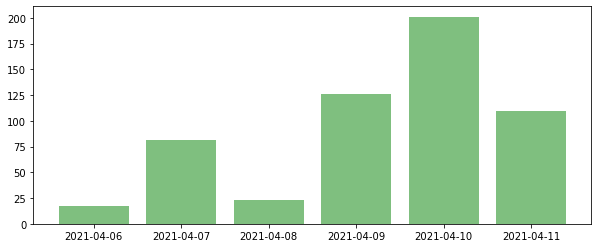

In [41]:
x_axis =dates
plt.figure(figsize=(10,4))
plt.bar(x_axis, daycount, color='g', alpha=.5, align="center")